In [1]:
# Import libraries for sound and display
import pandas as pd
import numpy as np
from os.path import join as pjoin
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import seaborn as sns
from playsound import playsound

import multiprocessing as mp
import timeit
from tqdm import tqdm

import sklearn.preprocessing as pr

Get one soundwave from each category

['hungry', 'discomfort', 'burping', 'belly_pain', 'tired']


0it [00:00, ?it/s]


ValueError: operands could not be broadcast together with shapes (101,) (215,) 

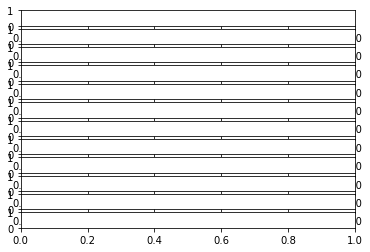

In [2]:
cleaned_corpus_path = "donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data"
new_dataset_path = "Infants Cry Sound/Dataset"
label_list = os.listdir(cleaned_corpus_path)[:-1]
print(label_list)

file_label = []
file_path = []
for l in label_list:
    data_dir = pjoin(cleaned_corpus_path, l)
    samples = 0
    for file in os.listdir(data_dir):
        path = pjoin(data_dir, file)
        file_path.append(path)
        file_label.append(l)
        samples += 1
        if samples > 1:
            break

label_df = pd.DataFrame(file_label, columns=["Cry"])
path_df = pd.DataFrame(file_path, columns=["Path"])
cry_df = pd.concat([label_df, path_df], axis=1)

waves = []
srs = []
for path, cry in tqdm(zip(cry_df.Path, cry_df.Cry)):
    # Resample to 16 kHz
    data, sr = librosa.load(path, sr=16000)
    data, _ = librosa.effects.trim(data)
    # Remove noise
    data = librosa.effects.preemphasis(data)
    data = librosa.util.normalize(data)
    D = librosa.stft(data)
    db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    data, _ = librosa.effects.trim(data, top_db=np.abs(db[0])*0.50)
    frame_size = int(sr * 0.5)  # 1.5 seconds
    hop_size = int(sr * 0.5)    # 0.5 seconds

    frames = librosa.util.frame(data, frame_length=frame_size, hop_length=hop_size, axis=0)
    fig, ax = plt.subplots(nrows=len(frames))
    for i in range(len(frames)):
        f, _ = librosa.effects.trim(frames[i], top_db=np.abs(db[0])*0.50, hop_length=int(hop_size*0.01))
        librosa.display.waveshow(y=frames[i], sr=sr, ax=ax[i])
        ax[i].set(title=f'Frame {i}')
        ax[i].label_outer()
    waves.append(data)
    srs.append(sr)

waves_df = pd.DataFrame(waves)
cry_df["Sr"] = srs
cry_df = pd.concat([cry_df, waves_df], axis=1)
print(cry_df.Cry.value_counts())
cry_df.head()

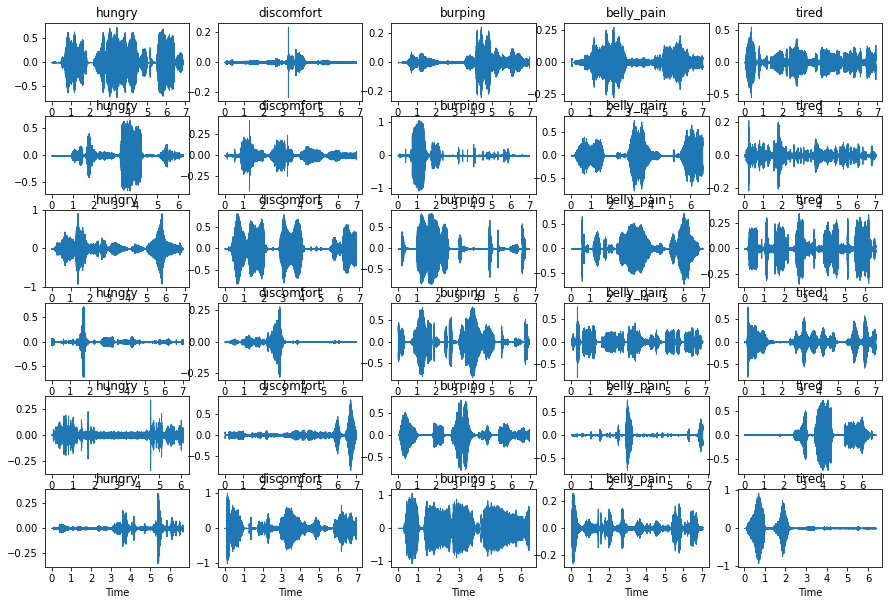

In [ ]:
fig, ax = plt.subplots(6, 5)
fig.set_size_inches(15, 10)
index = 0
label_num = 0
for wave, sr, category in zip(waves, srs, file_label):
    ax[index, label_num].set_title(category)
    librosa.display.waveshow(y=wave, sr=sr, ax=ax[index, label_num])
    if index == 5:
        label_num += 1
        index = 0
    else:
        index += 1

Shape of D object: (1025, 1715)
Shape of D object: (1025, 183)
Shape of D object: (1025, 216)
Shape of D object: (1025, 227)
Shape of D object: (1025, 276)
Shape of D object: (1025, 218)
Shape of D object: (1025, 187)
Shape of D object: (1025, 218)
Shape of D object: (1025, 1589)
Shape of D object: (1025, 1824)
Shape of D object: (1025, 216)
Shape of D object: (1025, 218)
Shape of D object: (1025, 217)


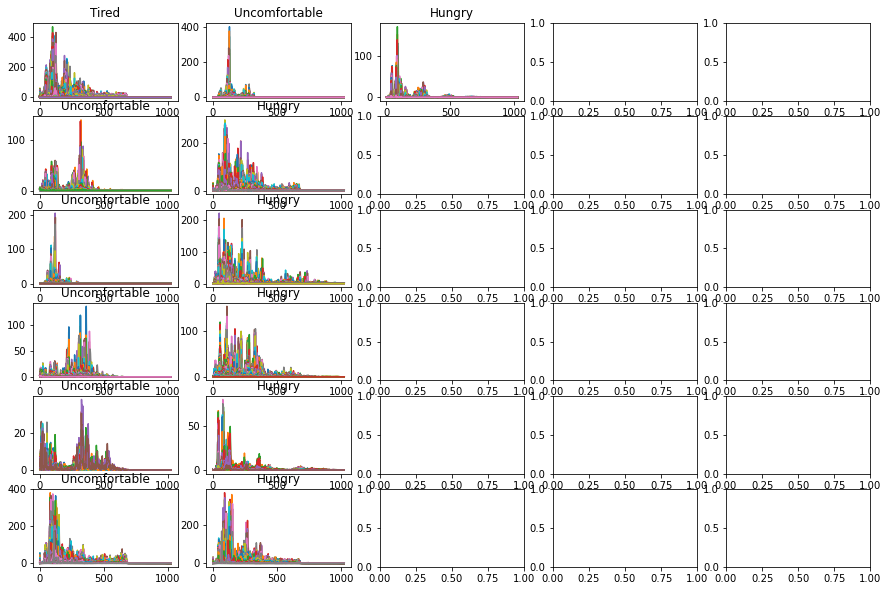

In [ ]:
fig, ax = plt.subplots(6, 5)
fig.set_size_inches(15, 10)
index = 0
label_num = 0
for wave, sr, category in zip(waves, srs, file_label):    
    # Default FFT window size
    n_fft = 2048 # FFT window size
    hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

    # Short-time Fourier transform (STFT)
    D = np.abs(librosa.stft(wave, n_fft = n_fft, hop_length = hop_length))

    print('Shape of D object:', np.shape(D))
    ax[index, label_num].set_title(category)
    ax[index, label_num].plot(D)
    if index == 5:
        label_num += 1
        index = 0
    else:
        index += 1

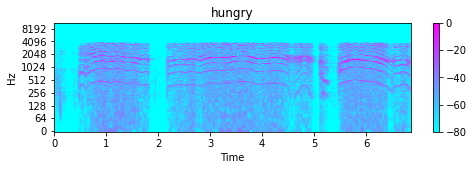

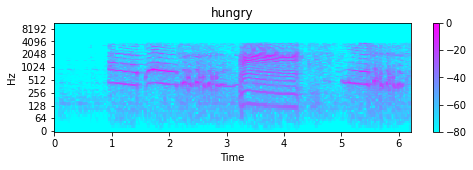

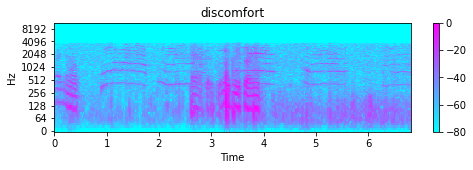

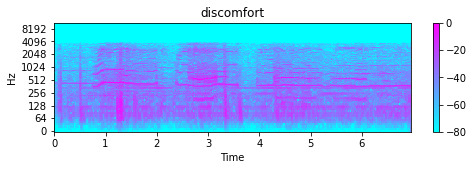

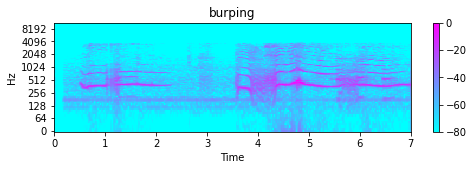

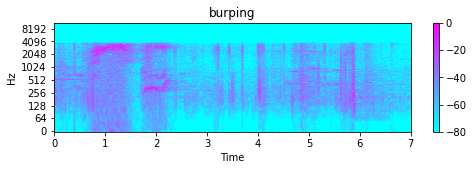

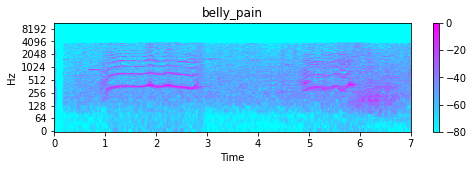

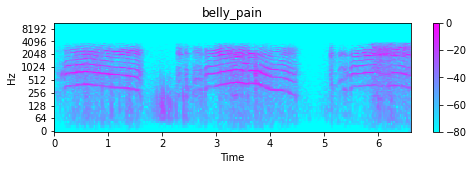

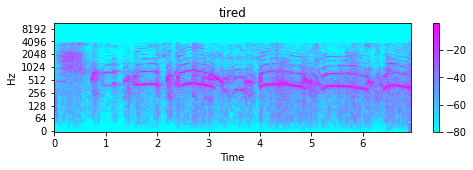

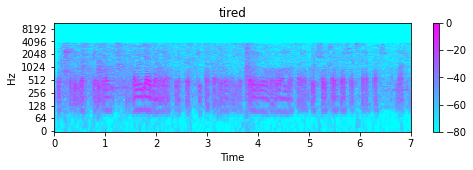

In [ ]:
for wave, sr, category in zip(waves, srs, file_label):    
    # Default FFT window size
    n_fft = 2048 # FFT window size
    hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

    # Short-time Fourier transform (STFT)
    D = np.abs(librosa.stft(wave, n_fft = n_fft, hop_length = hop_length))

    # Convert an amplitude spectrogram to Decibels-scaled spectrogram.
    DB = librosa.amplitude_to_db(D, ref = np.max)

    # Creating the Spectogram
    plt.figure(figsize = (8, 2))
    plt.title(category)
    librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                            cmap = 'cool')
    plt.colorbar()

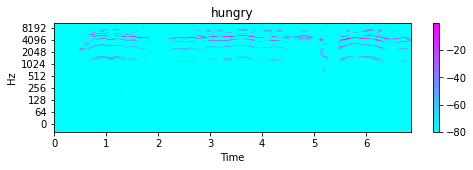

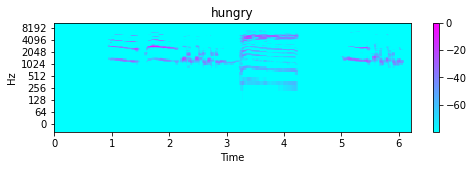

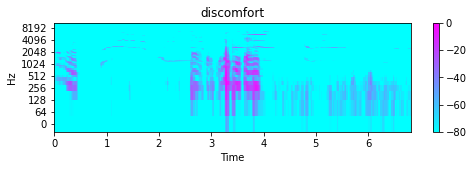

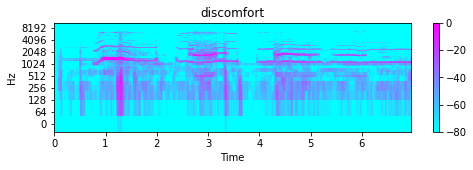

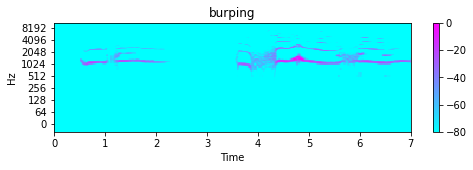

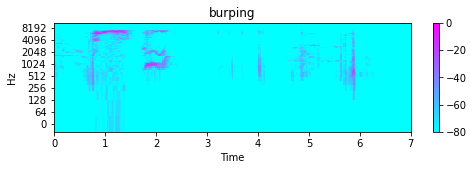

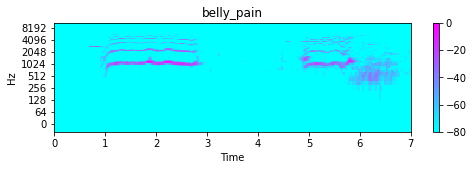

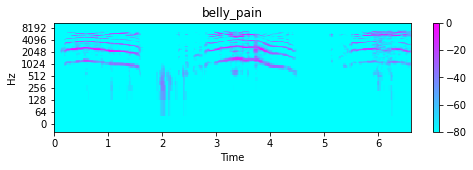

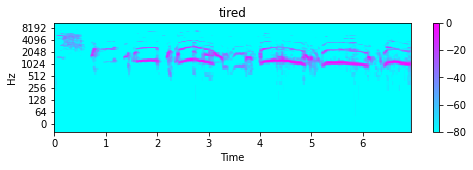

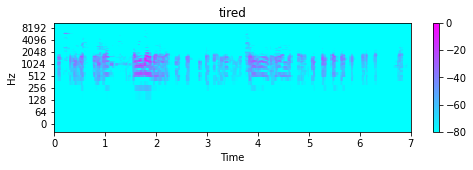

In [ ]:
for wave, sr, category in zip(waves, srs, file_label):  
    S = librosa.feature.melspectrogram(y=wave, sr=sr)
    S_DB = librosa.amplitude_to_db(S, ref=np.max)
    plt.figure(figsize = (8, 2))
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
    plt.colorbar()
    plt.title(category)